![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [93]:
def newton(f, df, x0, atol=1e-8, rtol=1e-8, maxiter=100):
    pontos = [x0]
    
    for i in range(maxiter):
        passo1 = f(x0)/df(x0)
        xnext = x0 - passo1
        passo2 = f(xnext)/df(xnext)
        pontos.append(xnext)

        if abs(passo1) < atol or abs(passo1 - passo2) < rtol:
            break
        
        x0 = xnext
        
    
    return pontos

In [94]:
L = newton(np.sin, np.cos, 3)


In [95]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [96]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [97]:
def poly1(x): return x**3 - x + 1

Dê a derivada da função acima

In [98]:
def d_poly1(x): return 3*x**2 -1

In [99]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

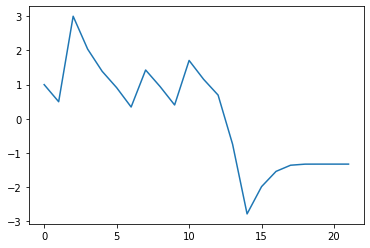

In [100]:
plt.plot(L)

Provavelmente, a função possui oscilações perto da raiz e o chute inicial não foi perto o suficiente para convergir rapidamente. 

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

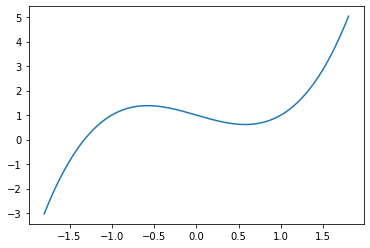

In [101]:
# YOUR CODE HERE
pontos = np.linspace(-1.8, 1.8, 200)
y = poly1(pontos)

plt.plot(pontos, y)

ax = plt.gca()

In [102]:
l = ax.lines[0]

valores = l.get_ydata()
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

O que você deduz?

Que realmente as oscilações perto da raiz, atrapalham o método de newton.

## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

$f(x) = x^3 - x + 1$

O que queremos em resumo é um valor de X tal que.

$y = x - \frac{f(x)}{f'(x)}$; $x = y - \frac{f(y)}{f'(y)}$

Jogando $f(x)$ na equação 1 acabamos achando que $y = \frac{2x^3 - 1}{3x^2 - 1}$. Usando a dica, dividiremos o $y = \frac{N(x)}{D(x)}$. Sendo $N(x) = 2x^3 - 1$; $D(x) = 3x^2 - 1$.

Agora jogaremos o valor que achamos pra y na equação 2.

$x = \frac{N(X)}{D(X)} - \frac{f(\frac{N(x)}{D(x)})}{f'(\frac{N(x)}{D(x)})}$. Desenvolvendo essa equação, achamos que $x(3N^2(x)D(x) - D^3(x)) = 2N^3(x) - D^3(x)$.

Substituindo o N(x) e D(x) na fórmula, descobriremos para quais valores de X é satisfeita o sistema de equações acima.
E se ao invés de igualarmos isso a 0, igualarmos a um p(x) teremos uma função polinomial.

Qual o grau deste polinômio?

É um polinômio de 9°.

Analisando apenas os termos de maior grau, temos que do lado esquerdo da igualdade teremos $36x^9$ e do lado direito $16x^9$, esses são os termos de maior 
grau, e como não se cancelam este é o grau do polinômio.

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [103]:
def periodo2(x):    
    n = 2 * x**3 - 1
    d = 3 * x**2 - 1
    
    return x * (3 * n**2 * d - d**3) - 2 * n**3 + d**3

In [104]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

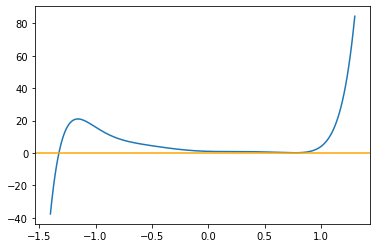

In [105]:
pontos = np.linspace(-1.4, 1.3, 200)
plt.plot(pontos, periodo2(pontos))
plt.axhline(0, color='orange')

Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

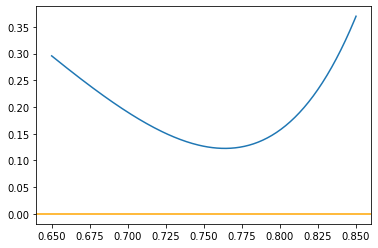

In [106]:
pontos = np.linspace(0.65, 0.85, 200)

plt.plot(pontos, periodo2(pontos))
plt.axhline(0, color='orange')

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

Pelo gráfico 1 é possível perceber que existe 2 assíntotas verticais, ou seja o gráfico é estritamente crescente em uma parte, e estritamente decrescente em outra parte. Logo devemos analisar justamente o ponto em que há certas 'turbulências' para encontrarmos raízes, e analisando essa parte é perceptível que há apenas 1 raiz.
E a raiz do polinômio é justamente o ponto 2-periódico da função f(x).

## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [107]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
assert len(L) == 40

Faça um gráfico da convergência dos erros

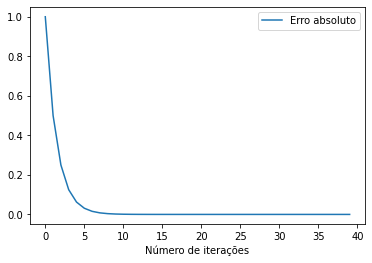

In [108]:
arrayL = np.array(L)
plt.plot(arrayL - 3, label='Erro absoluto')
plt.xlabel('Número de iterações')
plt.legend()
ax = plt.gca()

In [109]:
l = ax.get_lines()[0]
values = l.get_ydata()

assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

In [110]:
assert len(ax.get_xlabel()) > 5

Qual a velocidade de convergência destas iterações?

Nesse caso específico, é perceptível que o erro é dividido por 2 a cada iteração e o gráfico do erro pode ser descrito como $$\frac{1}{2^x} (x\geqslant1)$$

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

Newton: $X_{k+1}= X_k - \frac{f(x_k)}{f'(x_k)}$. Nesse caso específico fica $X_{k+1}= X_k - \frac{X_k-3}{2}$. Agora podemos descrever o $X_{k}$ partindo de  um ponto inicial $X_{0}$. Assim terá a fórmula exata do "próximo ponto".